In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import ranksums, mannwhitneyu

In [3]:
LSTM_45_72M = pd.read_csv("LSTM_4.5_72M_iterations.csv")
LSTM_45_12M = pd.read_csv("LSTM_4.5_12M_iterations.csv")
LSTM_45_6M = pd.read_csv("LSTM_4.5_6M_iterations.csv")

CNN_LSTM_45_72M = pd.read_csv("CNN_LSTM_4.5_72M_iterations.csv")
CNN_LSTM_45_12M = pd.read_csv("CNN_LSTM_4.5_12M_iterations.csv")
CNN_LSTM_45_6M = pd.read_csv("CNN_LSTM_4.5_6M_iterations.csv")

LSTM_6 = pd.read_csv("LSTM_6_iterations.csv")
CNN_LSTM_6 = pd.read_csv("CNN_LSTM_6_iterations.csv")

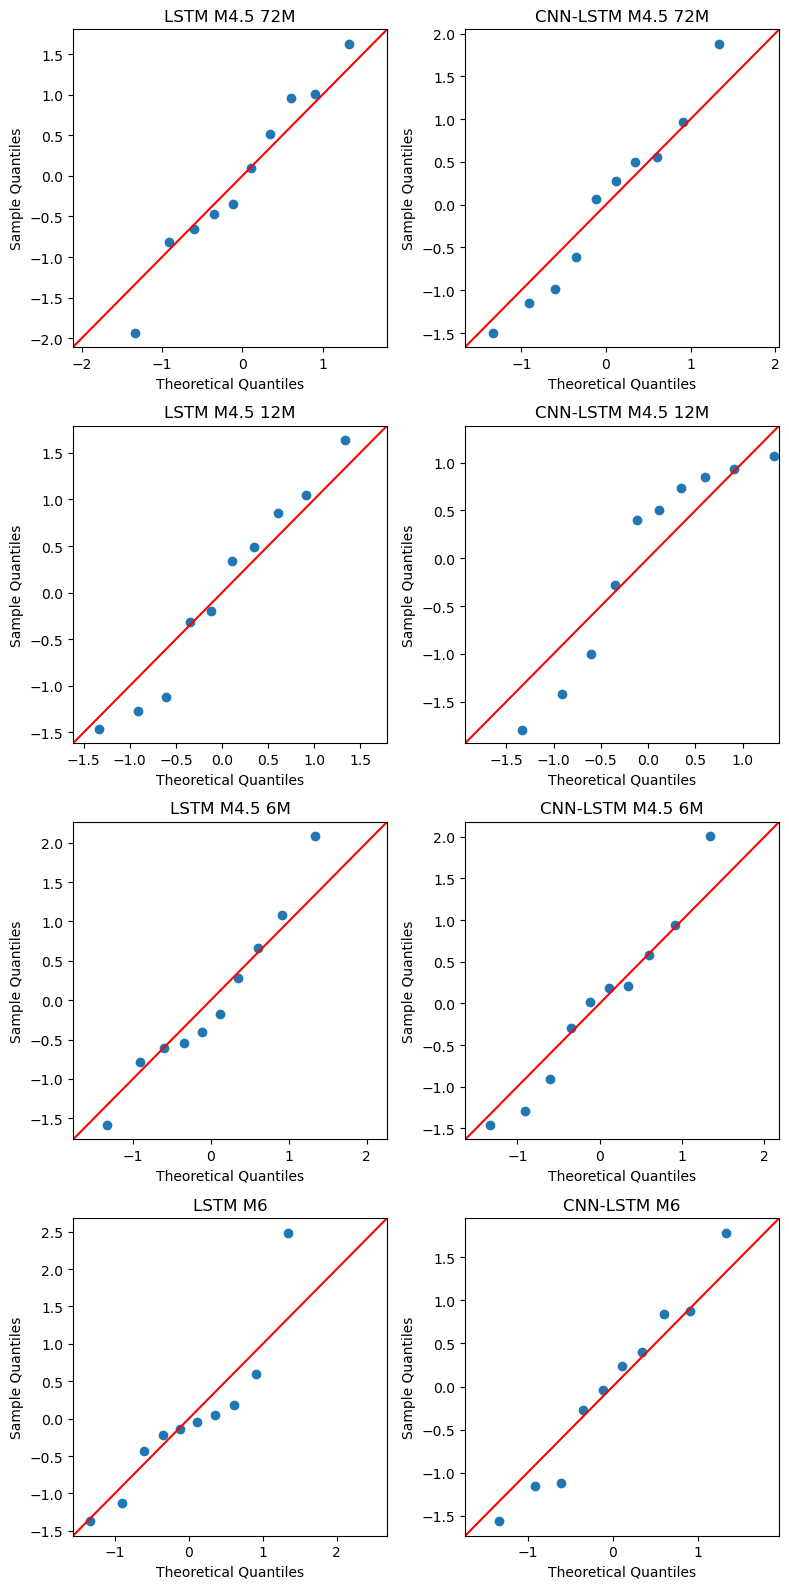

In [32]:
fig, axs = plt.subplots(4, 2, figsize=(8, 16))  # 4 rows, 2 columns

sm.qqplot(LSTM_45_72M.F1, fit=True, line="45", ax=axs[0, 0])
axs[0, 0].set_title('LSTM M4.5 72M')

sm.qqplot(LSTM_45_12M.F1, fit=True, line="45", ax=axs[0, 1])
axs[1, 0].set_title('LSTM M4.5 12M')

sm.qqplot(LSTM_45_6M.F1, fit=True, line="45", ax=axs[1, 0])
axs[2, 0].set_title('LSTM M4.5 6M')

sm.qqplot(CNN_LSTM_45_72M.F1, fit=True, line="45", ax=axs[1, 1])
axs[0, 1].set_title('CNN-LSTM M4.5 72M')

sm.qqplot(CNN_LSTM_45_12M.F1, fit=True, line="45", ax=axs[2, 0])
axs[1, 1].set_title('CNN-LSTM M4.5 12M')

sm.qqplot(CNN_LSTM_45_6M.F1, fit=True, line="45", ax=axs[2, 1])
axs[2, 1].set_title('CNN-LSTM M4.5 6M')

sm.qqplot(LSTM_6.F1, fit=True, line="45", ax=axs[3, 0])
axs[3, 0].set_title('LSTM M6')

sm.qqplot(CNN_LSTM_6.F1, fit=True, line="45", ax=axs[3, 1])
axs[3, 1].set_title('CNN-LSTM M6')

plt.tight_layout()
plt.savefig('graphs/qqplots.png')
plt.show()


In [143]:
group1, group2 = LSTM_45_72M.F1, LSTM_6.F1

# print(ranksums(group1, group2, alternative='two-sided'))
print(mannwhitneyu(group1, group2, use_continuity=True, alternative='greater'))

10.0 90.0 0.09090909090909091
MannwhitneyuResult(statistic=10.0, pvalue=0.09090909090909091)


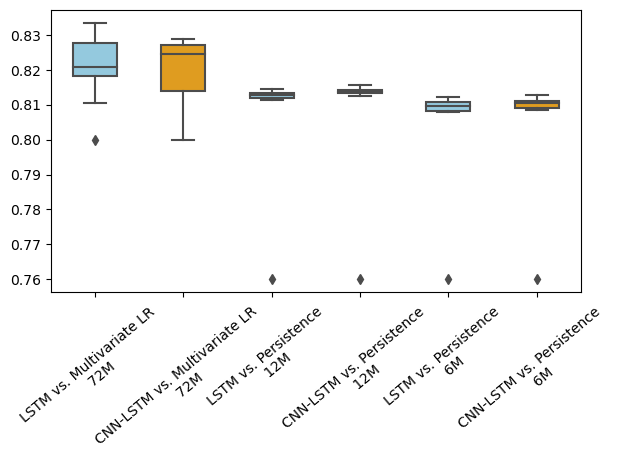

In [34]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

LSTM_45_72M_box = LSTM_45_72M.F1.tolist()
LSTM_45_72M_box.append(.8)

LSTM_45_12M_box = LSTM_45_12M.F1.tolist()
LSTM_45_12M_box.append(.76)

LSTM_45_6M_box = LSTM_45_6M.F1.tolist()
LSTM_45_6M_box.append(.76)

CNN_LSTM_45_72M_box = CNN_LSTM_45_72M.F1.tolist()
CNN_LSTM_45_72M_box.append(.8)

CNN_LSTM_45_12M_box = CNN_LSTM_45_12M.F1.tolist()
CNN_LSTM_45_12M_box.append(.76)

CNN_LSTM_45_6M_box = CNN_LSTM_45_6M.F1.tolist()
CNN_LSTM_45_6M_box.append(.76)

# Creating a list of all datasets
data_to_plot = [LSTM_45_72M_box, CNN_LSTM_45_72M_box, LSTM_45_12M_box, 
                CNN_LSTM_45_12M_box, LSTM_45_6M_box, CNN_LSTM_45_6M_box]

# Labels for each dataset
labels = ['LSTM vs. Multivariate LR \n 72M', 'CNN-LSTM vs. Multivariate LR \n 72M', 'LSTM vs. Persistence \n 12M', 
          'CNN-LSTM vs. Persistence \n 12M', 'LSTM vs. Persistence \n 6M', 'CNN-LSTM vs. Persistence \n 6M']

# Creating plot
fig, ax = plt.subplots()

# Colors for each boxplot
colors = ['skyblue', 'orange', 'skyblue', 'orange', 'skyblue', 'orange']

# Using seaborn's boxplot function to add each boxplot to the graph
sns.boxplot(data=data_to_plot, orient='v', width=0.5, palette=colors, ax=ax)

# Setting x-axis labels and title
ax.set_xticklabels(labels)
# ax.set_title('Boxplot of F1 scores')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=40)

plt.tight_layout()
plt.savefig('graphs/Boxplot.png')
plt.show()
